#### Задание 1

*Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.*

----

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

warnings.simplefilter("ignore")

# сгенерируем набор данных
data, y, coef = datasets.make_regression(n_samples=1000, n_features = 3, n_targets = 1, 
                                              noise = 20, coef = True, random_state = 27)

# Отмасштабируем данные методом стандартизации
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

X = data.T # транспонируем, чтобы было удобно использовать в коде регрессии

# шлобальное ограничение по иттер
max_iter = 1e5

# критерий сходимости
min_err_dist = 1e-3

# Скорость обучения
learning_rate = 0.01

X.shape, y.shape

((3, 1000), (1000,))

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
err_dist = err_pred = np.inf # зададим начальную разницу весов большим числом
iter_num = 0 # счетчик итераций

# Сначала метод градиентного спуска
W = np.zeros(X.shape[0])
# сюда будем складывать ошибки
gradient_errs = []

while err_dist > min_err_dist and iter_num < max_iter:
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W = W - 2*learning_rate*np.sum(X*(y_pred - y), axis=1)/len(y_pred)
    
    err_dist = np.abs(err_pred - err) # критерий останова
    err_pred = err
    iter_num += 1
    
    gradient_errs.append(err)

print(f'В случае использования градиентного спуска функционал ошибки составляет {err}')
print(f'В случае использования градиентного спуска потребовалось итераций {iter_num}')
print(W)

В случае использования градиентного спуска функционал ошибки составляет 412.1086208064117
В случае использования градиентного спуска потребовалось итераций 350
[90.60451665 22.52224517 94.8895097 ]


In [4]:
err_dist = err_pred = np.inf # зададим начальную разницу весов большим числом
iter_num = 0 # счетчик итераций

# Теперь методом стохастического градиентного спуска
W = np.zeros(X.shape[0])
# сюда будем складывать ошибки
stoh_errs = []

while err_dist > min_err_dist and iter_num < max_iter:
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    
    train_ind = np.random.randint(data.shape[0])    
    W = W - 2*learning_rate*np.dot(data[train_ind].T, (np.dot(data[train_ind], W) - y[train_ind]))
    
    err_dist = np.abs(err_pred - err) # критерий останова
    err_pred = err
    iter_num += 1
    
    stoh_errs.append(err)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {err}')
print(f'В случае использования стохастического градиентного спуска потребовалось итераций {iter_num}')
print(W)

В случае использования стохастического градиентного спуска функционал ошибки составляет 412.5047116995002
В случае использования стохастического градиентного спуска потребовалось итераций 520
[91.29443514 22.70296919 94.96821149]


Text(0, 0.5, 'MSE')

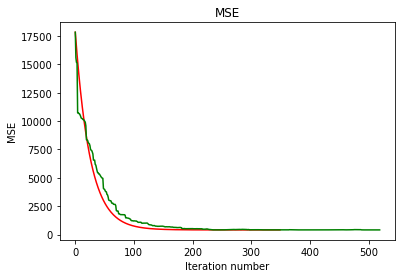

In [5]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(gradient_errs)), gradient_errs, c='red')
plt.plot(range(len(stoh_errs)), stoh_errs, c='green')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

График показывает, что стохастический и градиентный спуск пришли к минимуму примерно за одинаковое время, но градиент спуск дал более точный результат.

----
#### Задание 2

*Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.*

----

In [6]:
regCoef = 0.005 # коэффициент регуляризации

In [7]:
err_dist = err_pred = np.inf # зададим начальную разницу весов большим числом
iter_num = 0 # счетчик итераций

# Сначала метод градиентного спуска
W = np.zeros(X.shape[0])
# сюда будем складывать ошибки
gradient_errs = []

while err_dist > min_err_dist and iter_num < max_iter:
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W = W - 2*learning_rate*(np.sum(X*(y_pred - y), axis=1)/len(y_pred) + 2 * regCoef * W)
    
    err_dist = np.abs(err_pred - err) # критерий останова
    err_pred = err
    iter_num += 1
    
    gradient_errs.append(err)

print(f'В случае использования градиентного спуска функционал ошибки составляет {err}')
print(f'В случае использования градиентного спуска потребовалось итераций {iter_num}')
print(W)

В случае использования градиентного спуска функционал ошибки составляет 413.91759895330773
В случае использования градиентного спуска потребовалось итераций 453
[89.76880624 22.35463556 94.01123313]


In [8]:
err_dist = err_pred = np.inf # зададим начальную разницу весов большим числом
iter_num = 0 # счетчик итераций

# Теперь методом стохастического градиентного спуска
W = np.zeros(X.shape[0])
# сюда будем складывать ошибки
stoh_errs = []

while err_dist > min_err_dist and iter_num < max_iter:
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    
    train_ind = np.random.randint(data.shape[0])    
    W = W - 2*learning_rate*(np.dot(data[train_ind].T, (np.dot(data[train_ind], W) - y[train_ind])) + 2 * regCoef * W)
    
    err_dist = np.abs(err_pred - err) # критерий останова
    err_pred = err
    iter_num += 1
    
    stoh_errs.append(err)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {err}')
print(f'В случае использования стохастического градиентного спуска потребовалось итераций {iter_num}')
print(W)

В случае использования стохастического градиентного спуска функционал ошибки составляет 414.5903134972055
В случае использования стохастического градиентного спуска потребовалось итераций 1182
[90.92415645 21.05682947 94.3572598 ]


Text(0, 0.5, 'MSE')

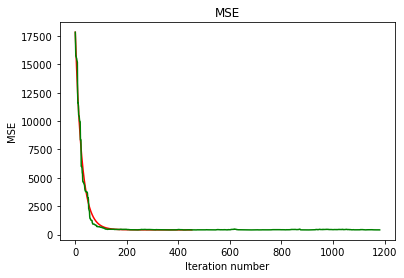

In [9]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(gradient_errs)), gradient_errs, c='red', label="Gradient")
plt.plot(range(len(stoh_errs)), stoh_errs, c='green', label="Stohastic Gradient")
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

L2 регуляризация сделала стохастичский спуск более гладким.

Но только при определенном коэффициенте регуляризации. При более низком он практически не влиял на результат, а при более высоком приводил к расхождению.

----
#### Задание 3
*Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.*

----

In [10]:
err_dist = err_pred = np.inf # зададим начальную разницу весов большим числом
iter_num = 0 # счетчик итераций

# Сначала метод градиентного спуска
W = np.zeros(X.shape[0])
# сюда будем складывать ошибки
gradient_errs = []

while err_dist > min_err_dist and iter_num < max_iter:
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W = W - 2*learning_rate*(np.sum(X*(y_pred - y), axis=1)/len(y_pred) + regCoef * np.sign(W))
    
    err_dist = np.abs(err_pred - err) # критерий останова
    err_pred = err
    iter_num += 1
    
    gradient_errs.append(err)

print(f'В случае использования градиентного спуска функционал ошибки составляет {err}')
print(f'В случае использования градиентного спуска потребовалось итераций {iter_num}')
print(W)

В случае использования градиентного спуска функционал ошибки составляет 412.10951505098643
В случае использования градиентного спуска потребовалось итераций 351
[90.60164958 22.51703936 94.88657932]


In [11]:
err_dist = err_pred = np.inf # зададим начальную разницу весов большим числом
iter_num = 0 # счетчик итераций

# Теперь методом стохастического градиентного спуска
W = np.zeros(X.shape[0])
# сюда будем складывать ошибки
stoh_errs = []

while err_dist > min_err_dist and iter_num < max_iter:
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    
    train_ind = np.random.randint(data.shape[0])    
    W = W - 2*learning_rate*(np.dot(data[train_ind].T, (np.dot(data[train_ind], W) - y[train_ind])) + regCoef * np.sign(W))
    
    err_dist = np.abs(err_pred - err) # критерий останова
    err_pred = err
    iter_num += 1
    
    stoh_errs.append(err)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {err}')
print(f'В случае использования стохастического градиентного спуска потребовалось итераций {iter_num}')
print(W)

В случае использования стохастического градиентного спуска функционал ошибки составляет 416.39351509430674
В случае использования стохастического градиентного спуска потребовалось итераций 533
[90.03204836 24.87145605 95.11205966]


Text(0, 0.5, 'MSE')

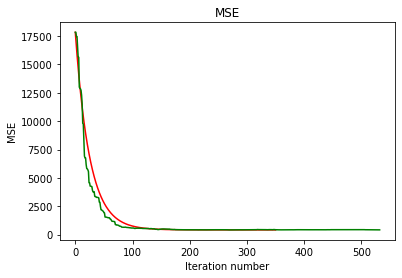

In [12]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(gradient_errs)), gradient_errs, c='red')
plt.plot(range(len(stoh_errs)), stoh_errs, c='green')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

L1 регуляризация при том же коэффициенте регуляризации дает меньший эффект.

Коэффициенты на данной выборке существенно не изменились.